<a href="https://colab.research.google.com/github/vivekkuamar-dudhat/Data-Visualization/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U kaleido --quiet

!pip install pandas numpy matplotlib seaborn plotly openpyxl -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.5 MB/s eta 0:00:00


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive

drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')


# ---- Load Dataset ----
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Confectionary.xlsx")
print(" Dataset Loaded Successfully")
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Dataset Loaded Successfully
Shape: (1001, 7)

Columns:
 ['Date', 'Country(UK)', 'Confectionary', 'Units Sold', 'Cost(£)', 'Profit(£)', 'Revenue(£)']


In [16]:
df.columns = [c.strip() for c in df.columns]
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
num_cols = ['Units Sold','Cost(£)','Profit(£)','Revenue(£)']
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df = df.dropna(subset=['Date'] + num_cols)

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)
df['Profit_Margin'] = df['Profit(£)'] / df['Revenue(£)']

print("Rows:", len(df))
print("Years:", df['Year'].min(), "-", df['Year'].max())
display(df.head())


Rows: 984
Years: 2000 - 2005


,Date,Country(UK),Confectionary,Units Sold,Cost(£),Profit(£),Revenue(£),Year,Month,YearMonth,Profit_Margin
0,2002-11-11,England,Biscuit,1118.0,2459.6,3130.4,749954.4,2002,11,2002-11,0.004174
1,2002-07-05,England,Biscuit,708.0,1557.6,1982.4,300758.4,2002,7,2002-07,0.006591
2,2001-10-31,England,Biscuit,1269.0,2791.8,3553.2,966216.6,2001,10,2001-10,0.003677
3,2004-09-13,England,Biscuit,1631.0,3588.2,4566.8,1596096.6,2004,9,2004-09,0.002861
4,2004-03-10,England,Biscuit,2240.0,4928.0,6272.0,3010560.0,2004,3,2004-03,0.002083


In [17]:
display(df[num_cols + ['Profit_Margin']].describe().round(3))

,Units Sold,Cost(£),Profit(£),Revenue(£),Profit_Margin
count,984.000,984.000,984.000,9.840000e+02,984.000
mean,1633.599,2818.789,4025.956,2.552826e+06,0.003
std,875.540,2066.154,2651.752,2.822196e+06,0.003
min,200.000,40.000,160.000,2.400000e+04,0.000
25%,923.000,1211.800,1873.200,6.193690e+05,0.001
50%,1530.500,2459.600,3467.400,1.630818e+06,0.002
75%,2300.000,3977.625,5452.500,3.549870e+06,0.004
max,4493.000,10994.500,13479.000,2.018705e+07,0.027


In [18]:
# Average profit margin by region and confectionary
avg_margin = df.groupby(['Country(UK)','Confectionary'])['Profit_Margin'].mean().reset_index()

In [19]:
# Highest & lowest margin confectionery per region
highest = avg_margin.loc[avg_margin.groupby('Country(UK)')['Profit_Margin'].idxmax()]
lowest  = avg_margin.loc[avg_margin.groupby('Country(UK)')['Profit_Margin'].idxmin()]
print("Highest margin per region:")
display(highest)
print("Lowest margin per region:")
display(lowest)

Highest margin per region:


,Country(UK),Confectionary,Profit_Margin
3,England,Caramel nut,0.006036
9,Jersey,Caramel nut,0.006342
15,N. Ireland,Caramel Nut,0.008728
22,Scotland,Caramel Nut,0.005217
30,Wales,Caramel Nut,0.007217


Lowest margin per region:


,Country(UK),Confectionary,Profit_Margin
1,England,Biscuit Nut,0.001759
11,Jersey,Plain,0.000907
18,N. Ireland,Plain,0.001074
26,Scotland,Plain,0.001121
33,Wales,Plain,0.001054


In [20]:
# Region with highest total revenue
region_revenue = df.groupby('Country(UK)')['Revenue(£)'].sum().sort_values(ascending=False)
print("Total revenue by region:")
display(region_revenue)

Total revenue by region:


,Revenue(£)
Country(UK),
Scotland,633388869.0
Jersey,628042403.5
N. Ireland,434023594.8
England,424584483.5
Wales,391940994.4


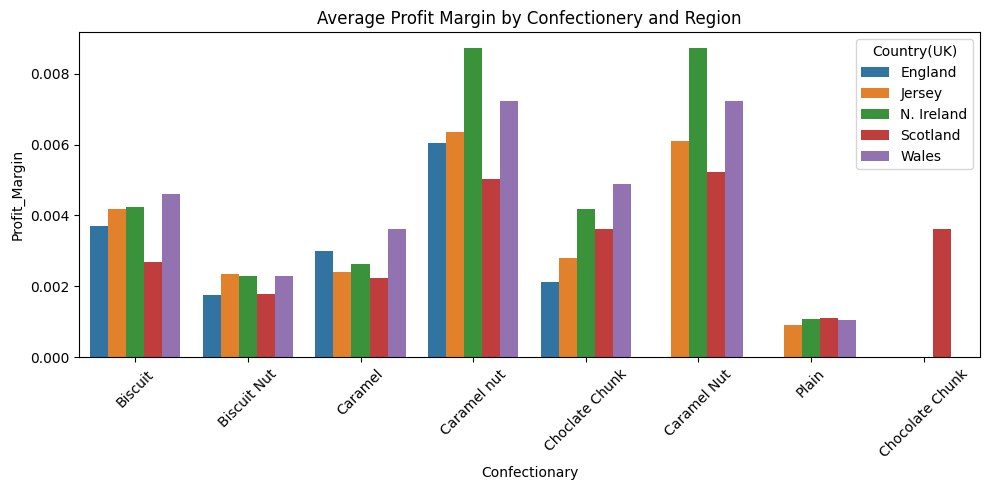

In [35]:
import os
os.makedirs("visualisations", exist_ok=True)

plt.figure(figsize=(10,5))
sns.barplot(data=avg_margin, x='Confectionary', y='Profit_Margin', hue='Country(UK)')
plt.title("Average Profit Margin by Confectionery and Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visualisations/figure_1_avg_profit_margin.png", dpi=300)
plt.show()
plt.close()

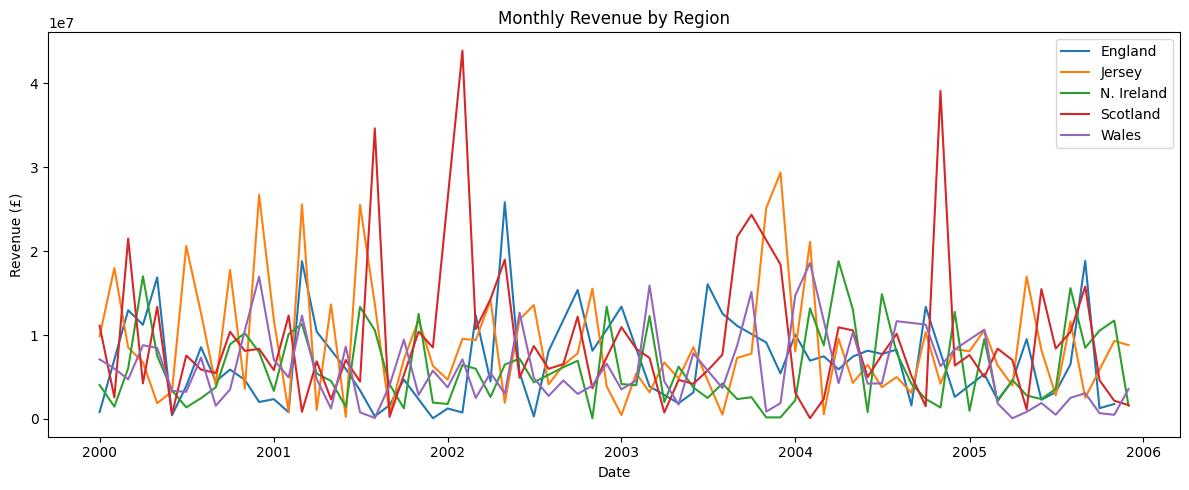

In [36]:
plt.figure(figsize=(12,5))
for r in monthly_rev['Country(UK)'].unique():
    d = monthly_rev[monthly_rev['Country(UK)']==r]
    plt.plot(d['YearMonth_dt'], d['Revenue(£)'], label=r)
plt.title("Monthly Revenue by Region")
plt.xlabel("Date")
plt.ylabel("Revenue (£)")
plt.legend()
plt.tight_layout()
plt.savefig("visualisations/figure_2_monthly_revenue.png", dpi=300)
plt.show()
plt.close()

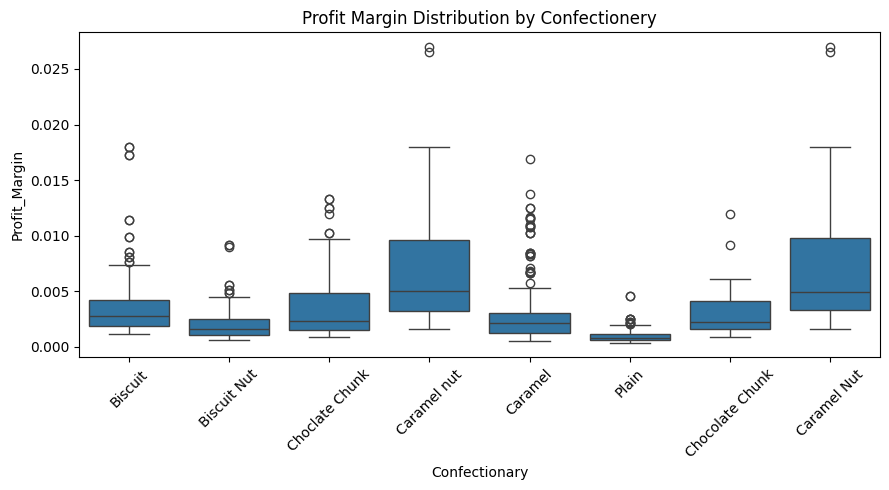

In [38]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df, x='Confectionary', y='Profit_Margin')
plt.title("Profit Margin Distribution by Confectionery")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visualisations/figure_3_profit_margin_boxplot.png", dpi=300)
plt.show()
plt.close()


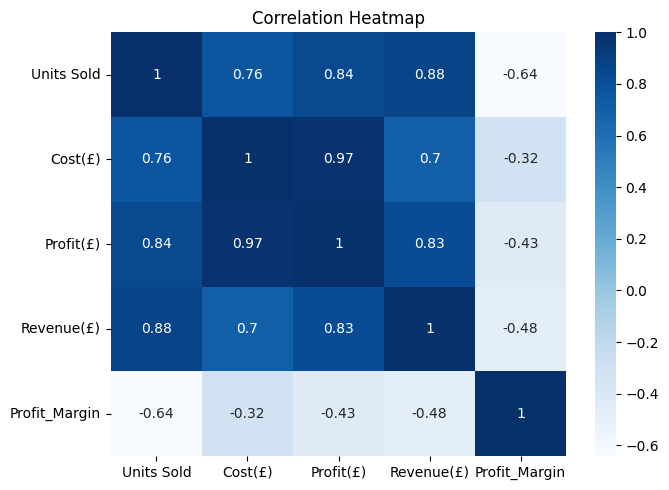

In [39]:
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("visualisations/figure_4_correlation_heatmap.png", dpi=300)
plt.show()
plt.close()

In [40]:
fig.write_html("visualisations/figure_5_plotly_line.html")
fig2.write_html("visualisations/figure_6_plotly_bar.html")

print("All visualisations saved successfully")

All visualisations saved successfully


In [41]:
fig = px.line(monthly_rev, x='YearMonth_dt', y='Revenue(£)', color='Country(UK)',
              title='Interactive: Monthly Revenue by Region',
              labels={'YearMonth_dt':'Date','Revenue(£)':'Revenue (£)'})
fig.show()

In [42]:
fig2 = px.bar(avg_margin, x='Confectionary', y='Profit_Margin', color='Country(UK)',
              barmode='group', title='Interactive: Avg Profit Margin by Type and Region')
fig2.show()